$$
\begin{align}
-10.2x_1 + 9.3x_2 &= 73 \\
5.3x_1 + 15.8x_2 &= 173 \\
17.2x_1 + 10.3x_2 &= 159
\end{align}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

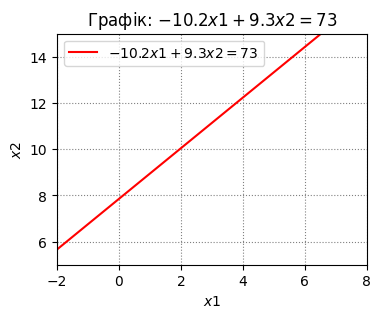

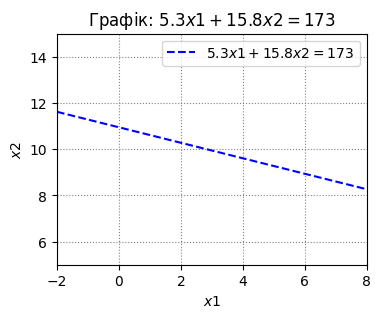

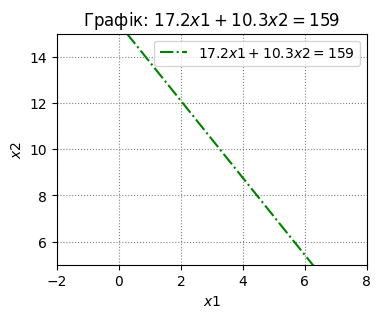

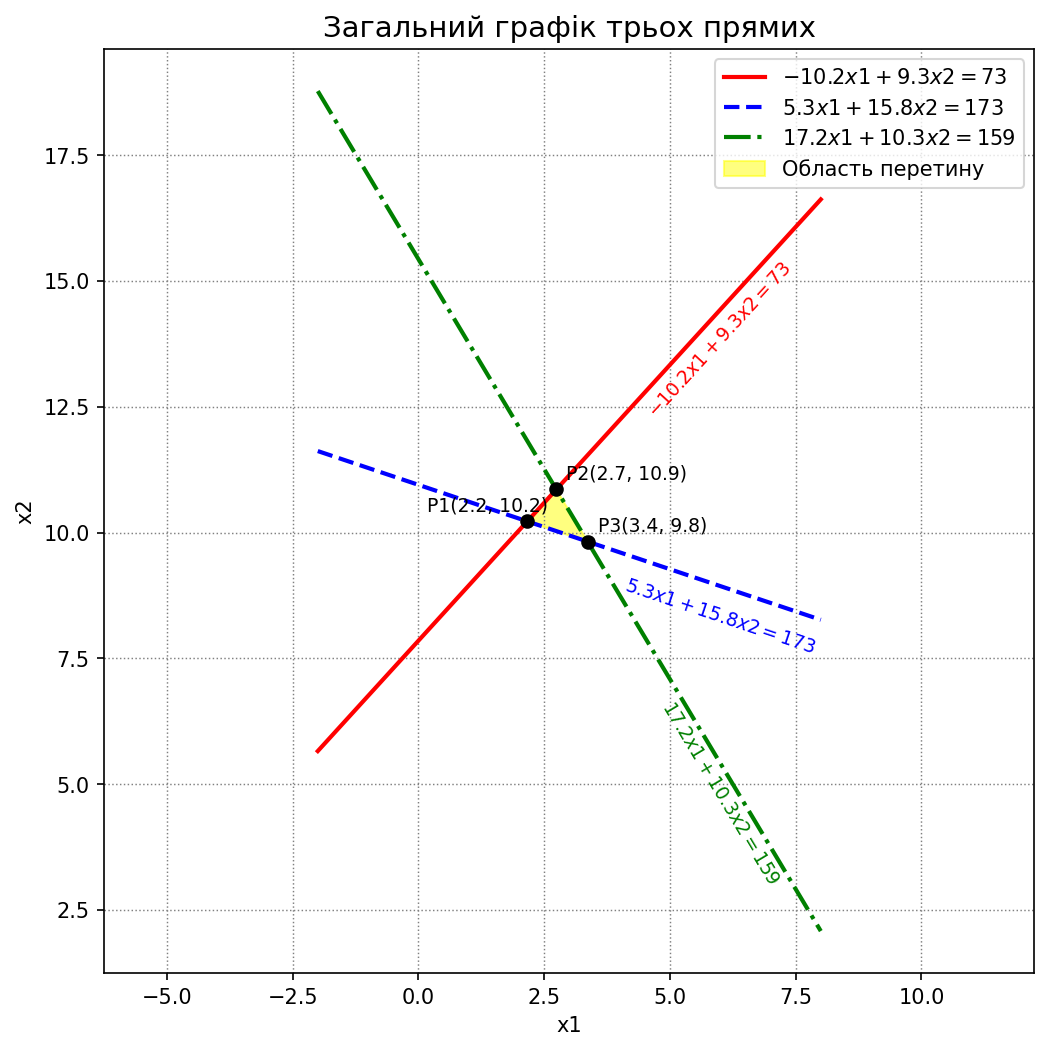

In [37]:
eqs = [
    {'A': -10.2, 'B': 9.3, 'C': 73, 'color': 'red',   'linestyle': '-',  'label': r'$-10.2 x1 + 9.3 x2 = 73$'},
    {'A': 5.3, 'B': 15.8, 'C': 173, 'color': 'blue',  'linestyle': '--', 'label': r'$5.3 x1 + 15.8 x2 = 173$'},
    {'A': 17.2, 'B': 10.3, 'C': 159, 'color': 'green', 'linestyle': '-.', 'label': r'$17.2 x1 + 10.3 x2 = 159$'}
]  # A*x1 + B*x2 = C

x_min, x_max = -2, 8
y_min, y_max = 5, 15
x = np.linspace(x_min, x_max, 400)  # Діапазон X1 для всіх ліній


def line_y(A, B, C, x):  # X2
    return (C - A * x) / B


for eq in eqs:
    y = line_y(eq['A'], eq['B'], eq['C'], x)
    plt.figure(figsize=(4, 3), dpi=100)
    plt.plot(x, y, color=eq['color'], linestyle=eq['linestyle'], label=eq['label'])
    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')
    plt.title(f"Графік: {eq['label']}")
    plt.grid(True, color='gray', linestyle=':')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.show()


def intersection(eq1, eq2):  # Знаходження точок перетину
    A = np.array([[eq1['A'], eq1['B']], [eq2['A'], eq2['B']]])
    B = np.array([eq1['C'], eq2['C']])
    return np.linalg.solve(A, B)


points = []
pairs = [(0,1), (0,2), (1,2)]
for i, j in pairs:
    p = intersection(eqs[i], eqs[j])
    points.append(p)

points_arr = np.array(points)
px, py = points_arr[:, 0], points_arr[:, 1]

plt.figure(figsize=(8, 8), dpi=150)  # Графік з перетинанням

x = np.linspace(x_min, x_max, 400)
for eq in eqs:
    y = line_y(eq['A'], eq['B'], eq['C'], x)
    plt.plot(x, y, color=eq['color'], linestyle=eq['linestyle'], linewidth=2, label=eq['label'])

for idx, p in enumerate(points):  # Точки перетину
    plt.scatter(*p, color='black', zorder=5)
    if idx == 0:
        plt.text(p[0] - 2, p[1] + 0.2, f"P{idx+1}({p[0]:.1f}, {p[1]:.1f})", fontsize=9)
    else:
        plt.text(p[0] + 0.2, p[1] + 0.2, f"P{idx+1}({p[0]:.1f}, {p[1]:.1f})", fontsize=9)

polygon = np.array(points) # Область перетину
plt.fill(polygon[:, 0], polygon[:, 1], color='yellow', alpha=0.5, label='Область перетину')

for eq in eqs:  # Додати підписи
    x0 = 6  # Точка старту для підпису
    y0 = line_y(eq['A'], eq['B'], eq['C'], x0) - 0.6
    slope = -eq['A'] / eq['B']  # Нахил
    angle = np.degrees(np.arctan(slope))
    plt.text(x0, y0, eq['label'], color=eq['color'], rotation=angle, fontsize=9, va='center', ha='center')

plt.title("Загальний графік трьох прямих", fontsize=14)  # Для графіку з усіма лініями
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.axis('equal')

plt.show()